In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load dataset


data = pd.read_csv("C:\\Users\\ADMIN\\Documents\\dataset.csv")

In [4]:
# Display first few rows
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [8]:
# Check for null values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [10]:
# Data Info
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


In [12]:
# Statistical Description
print("\nStatistical Summary:")
print(data.describe())



Statistical Summary:
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.87035

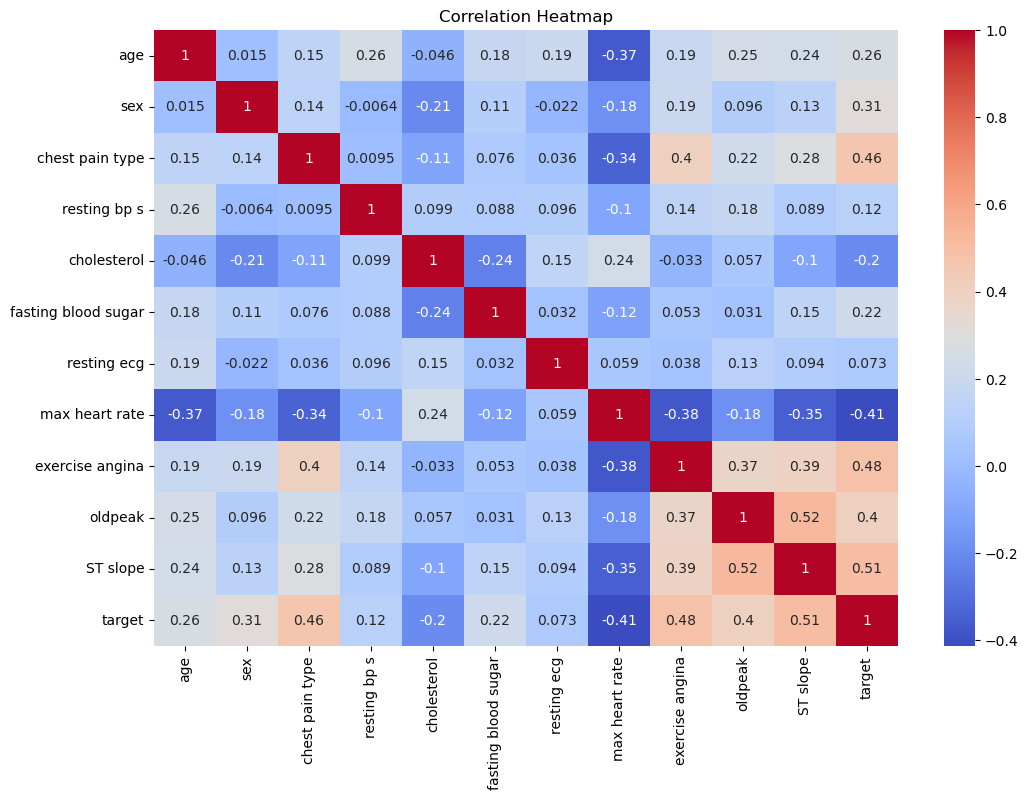

In [14]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
print(data.columns)


Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [43]:
# Clean column names by replacing spaces with underscores
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Confirm columns after cleaning
print("\nCleaned column names:")
print(data.columns)

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# Check shapes
print("\nX shape:", X.shape)
print("y shape:", y.shape)



Cleaned column names:
Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'st_slope', 'target'],
      dtype='object')

X shape: (1190, 11)
y shape: (1190,)


In [45]:
print(data.columns)


Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'st_slope', 'target'],
      dtype='object')


In [66]:
# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
print(X)

      age  sex  chest_pain_type  resting_bp_s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [70]:

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
print(X_test)

[[ 0.76206645  0.56764621  0.8175941  ... -0.77807216  0.0862159
   0.61805709]
 [ 0.01982576  0.56764621 -0.24717961 ...  1.28522783  0.54220223
   0.61805709]
 [ 0.12586014 -1.76166066 -1.31195333 ... -0.77807216 -0.82575675
  -1.00733062]
 ...
 [ 0.12586014 -1.76166066 -1.31195333 ... -0.77807216  0.45100496
   0.61805709]
 [-1.14655248  0.56764621  0.8175941  ...  1.28522783  0.99818855
   0.61805709]
 [ 0.12586014  0.56764621  0.8175941  ...  1.28522783  0.72459676
   2.2434448 ]]


In [74]:
print(X_train)

[[ 0.97413522  0.56764621  0.8175941  ...  1.28522783  0.81579402
  -1.00733062]
 [-2.20689633  0.56764621 -0.24717961 ... -0.77807216 -0.82575675
  -1.00733062]
 [ 0.23189453 -1.76166066  0.8175941  ...  1.28522783  0.90699129
   0.61805709]
 ...
 [ 0.76206645  0.56764621 -2.37672704 ... -0.77807216  1.54537215
   0.61805709]
 [ 0.86810084 -1.76166066  0.8175941  ... -0.77807216  2.4573448
   2.2434448 ]
 [-1.25258687  0.56764621 -1.31195333 ... -0.77807216 -0.82575675
  -1.00733062]]


In [56]:
# Model training - Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [80]:
# Predictions
y_pred = model.predict(X_test)
print(y_pred)


[1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1]


In [60]:
# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 98   9]
 [  4 127]]


In [62]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



In [64]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Accuracy Score:
0.9453781512605042
